In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/DillonOuimet/ECGR_4105/main/Homework_2/Data')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
Size_Data =data.shape
print (Size_Data[1])

9


In [28]:
# Question 1

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
#Split the data
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state= 42)

data_train.shape
mTrain = len(data_train)
data_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#sc_X = StandardScaler()

#Scale the data
scalerNormal = MinMaxScaler()
Train = scalerNormal.fit_transform(data_train)
Test = scalerNormal.fit_transform(data_test)

In [31]:
#Split the X and Y data in the training and testing data
X_Test = Test[:, [0,1,2,3,4,5,6,7]]
Y_Test = Test[:, 8]

X_Train = Train[:, [0,1,2,3,4,5,6,7]]
Y_Train = Train[:, 8]

In [32]:
#Import LogisticRegression from sklearn.linear_model

from sklearn.linear_model import LogisticRegression
#Train the data

classifier = LogisticRegression(random_state=0)
classifier.fit(X_Train, Y_Train)


LogisticRegression(random_state=0)

In [33]:
Y_pred = classifier.predict(X_Test)
Y_pred[0:9]

array([0., 0., 0., 0., 1., 0., 0., 1., 1.])

In [34]:
from sklearn.metrics import confusion_matrix
#make the confustion matrix
cnf_matrix = confusion_matrix(Y_Test, Y_pred)
cnf_matrix

array([[82, 17],
       [20, 35]], dtype=int64)

In [35]:
from sklearn import metrics

#grab the metrics
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_pred))
print("Precision:",metrics.precision_score(Y_Test, Y_pred))
print("Recall:",metrics.recall_score(Y_Test, Y_pred))


Accuracy: 0.7597402597402597
Precision: 0.6730769230769231
Recall: 0.6363636363636364


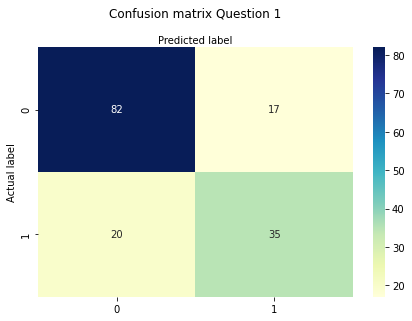

In [36]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix Question 1', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');



In [37]:
#Question 2

In [38]:
from sklearn.naive_bayes import GaussianNB
#run the NB classifier
X_TestQ2 = Test[:, [0,1,2,3,4,5,6,7]]
Y_TestQ2 = Test[:, 8]

X_TrainQ2 = Train[:, [0,1,2,3,4,5,6,7]]
Y_TrainQ2 = Train[:, 8]

classifierGaus = GaussianNB()
classifierGaus.fit(X_TrainQ2, Y_TrainQ2)


GaussianNB()

In [39]:
Y2_pred_Q2 = classifierGaus.predict(X_TestQ2)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_Test, Y2_pred_Q2)

In [41]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y2_pred_Q2))
print("Precision:",metrics.precision_score(Y_Test, Y2_pred_Q2))
print("Recall:",metrics.recall_score(Y_Test, Y2_pred_Q2))

Accuracy: 0.6883116883116883
Precision: 0.5411764705882353
Recall: 0.8363636363636363


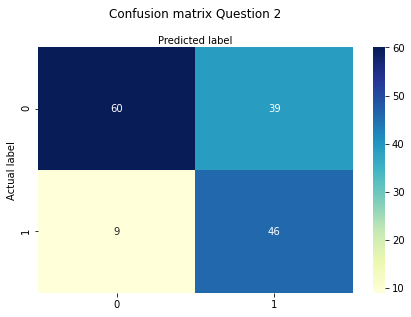

In [42]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout()
plt.title('Confusion matrix Question 2', y=1.1)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [43]:
#Question 3 k = 5

In [44]:
# X and Y:
K_data = scalerNormal.fit_transform(data)
K_X = K_data[:, [0,1,2,3,4,5,6,7]]
K_Y = K_data[:, 8]

In [45]:
#Using the Cross_Val function I will create a function to be called for logrithmic regression. 

def K_Fold(k, K_X, K_Y):

    scoring = ['accuracy', 'precision', 'recall']
    split = KFold(n_splits=k, random_state=42, shuffle = True)
    
    lr = LogisticRegression(random_state=42)
    scores = cross_validate(lr, K_X, K_Y, scoring=scoring, cv=split, n_jobs=-1)
   
    Accuracy_Q3_5 = sum(scores['test_accuracy']) / k
    Precision_Q3_5 = sum(scores['test_precision']) / k
    Recall_Q3_5 = sum(scores['test_recall']) / k

  

    print("Accuracy:",Accuracy_Q3_5)
    print("Precision:",Precision_Q3_5)
    print("Recall:",Recall_Q3_5)
    return 

In [46]:
#Here I do 5 fold validation for Logrithmic regression 
K_Fold(5, K_X, K_Y)

Accuracy: 0.7656226126814362
Precision: 0.7386700986700987
Recall: 0.5120830595261395


In [47]:
#Here I do 10 fold validation for Logrithmic regression 
K_Fold(10, K_X, K_Y)

Accuracy: 0.7694292549555708
Precision: 0.7355244291312403
Recall: 0.5248885630498533


In [48]:
#See report for answer to question 4 